In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer

In [8]:
arr1 = np.array([1, None, 3, 4])
arr1.dtype

dtype('O')

In [40]:
arr1.sum()

nan

In [10]:
arr1 = np.array([1, np.nan, 3, 4])
arr1.sum()

nan

In [11]:
np.nanmax(arr1)

4.0

In [12]:
ser = pd.Series([1, np.nan, 2, None])
ser

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [13]:
print(ser, '\n')
print(ser.isnull(), '\n')
print(ser.notnull())

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64 

0    False
1     True
2    False
3     True
dtype: bool 

0     True
1    False
2     True
3    False
dtype: bool


In [17]:
ser.dropna()

0    1.0
2    2.0
dtype: float64

In [19]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df.dropna()

,0,1,2
1,2.0,3.0,5


In [20]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [23]:
df[3] = np.nan

In [25]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [27]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [29]:
ser = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
ser

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [31]:
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [33]:
ser.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [35]:
ser.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [41]:
df.fillna(method='bfill', axis='rows')

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [43]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

In [45]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
%config InlineBackend.figure_format = 'svg'

<AxesSubplot:xlabel='Datetime'>

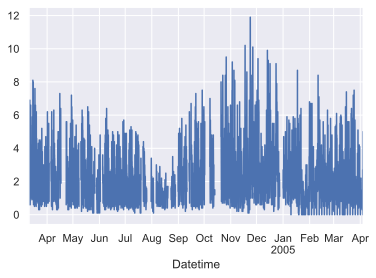

In [49]:
df['CO(GT)'].plot()

In [51]:
imp_locf = df['CO(GT)'].copy().ffill()
imp_nocb = df['CO(GT)'].copy().bfill()
imp_linear = df['CO(GT)'].copy().interpolate()
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())

In [54]:
imputer = KNNImputer(n_neighbors=5)    # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)

In [56]:
imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)

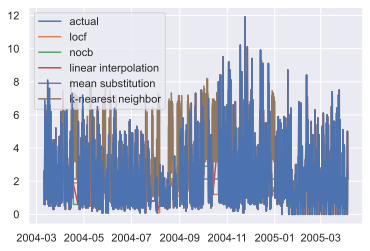

In [58]:
plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()

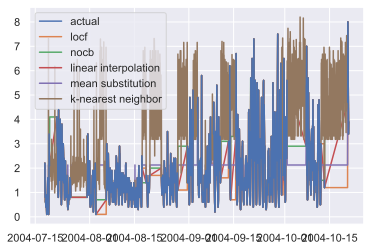

In [59]:
start = '2004-07-18'
end = '2004-10-20'

plt.plot(df['CO(GT)'].loc[start:end], label='actual', zorder=10)
plt.plot(imp_locf.loc[start:end], label='locf', zorder=1)
plt.plot(imp_nocb.loc[start:end], label='nocb', zorder=2)
plt.plot(imp_linear.loc[start:end], label='linear interpolation', zorder=3)
plt.plot(imp_mean.loc[start:end], label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'].loc[start:end], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()
